# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.765562e+01     1.553748e+01
 * time: 0.0017230510711669922
     1     3.625763e+01     1.179829e+01
 * time: 0.004534006118774414
     2     2.367876e+01     3.720089e+00
 * time: 0.010461091995239258
     3     2.103545e+01     2.222794e+00
 * time: 0.015376091003417969
     4     2.004924e+01     3.311328e+00
 * time: 0.020452022552490234
     5     1.891313e+01     1.606569e+00
 * time: 0.025663137435913086
     6     1.824878e+01     1.936073e+00
 * time: 0.029842138290405273
     7     1.786191e+01     1.326968e+00
 * time: 0.0341489315032959
     8     1.763654e+01     1.152476e+00
 * time: 0.03842592239379883
     9     1.742348e+01     8.414735e-01
 * time: 0.042691946029663086
    10     1.732707e+01     6.371511e-01
 * time: 0.04687809944152832
    11     1.732468e+01     1.142164e+00
 * time: 0.05021500587463379
    12     1.725688e+01     9.402882e-01
 * time: 0.053475141525268555
    13     1.722304e+01     8.718900e-01

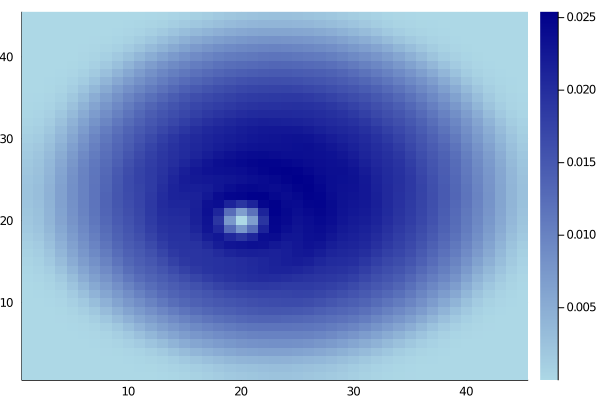

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)